In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
from IPython.display import display #display() for DataFrames

In [2]:
import visuals as vs
# Pretty display for notebooks
%matplotlib inline
from matplotlib.colors import ListedColormap

# diabetes dataset
try:
    data = pd.read_csv(r'C:\Users\visha\OneDrive\Desktop\diabetes-detection-master\diabetes-detection-master\diabetes.csv')
    print ("Diabetes dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Diabetes dataset has 768 samples with 9 features each.


In [3]:
# Display a description of the dataset
display(data.describe())

n_patients = data.shape[0]

# number of features
n_features = data.shape[1] - 1 # Need to remove one to account for target column

# diabetic patients
n_diabetic = data['Outcome'].value_counts()[1]

# non - diabetic patients
n_not_diabetic = data['Outcome'].value_counts()[0]

# diabetic rate
diabetic_rate = (100.0/n_patients) * n_diabetic

print ("Total number of patients: {}".format(n_patients))
print ("Number of features: {}".format(n_features))
print ("Number of patients with diabetes: {}".format(n_diabetic))
print ("Number of patients without diabetes: {}".format(n_not_diabetic))
print ("Rate of diabetes in dataset: {}%".format(diabetic_rate))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Total number of patients: 768
Number of features: 8
Number of patients with diabetes: 268
Number of patients without diabetes: 500
Rate of diabetes in dataset: 34.895833333333336%


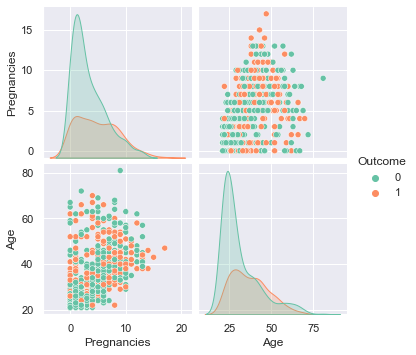

In [5]:
# Further visualisations

import seaborn
seaborn.set()

sns.pairplot(data, vars=["Pregnancies", "Age"],  hue="Outcome", palette="Set2", diag_kind="kde", height=2.5)

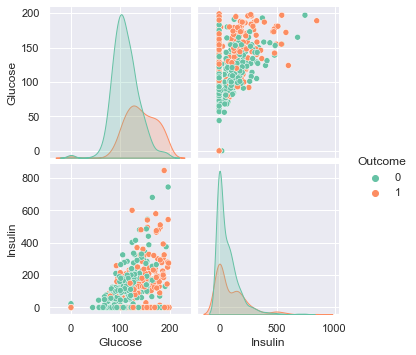

In [6]:
sns.pairplot(data, vars=["Glucose", "Insulin"],  hue="Outcome", palette="Set2", diag_kind="kde", height=2.5)

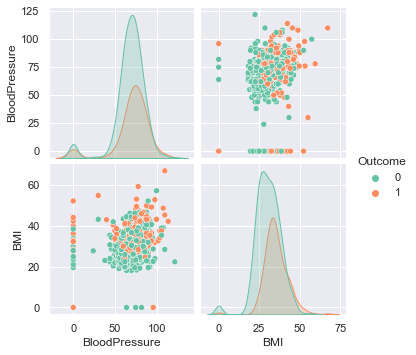

In [7]:
sns.pairplot(data, vars=["BloodPressure", "BMI"],  hue="Outcome", palette="Set2", diag_kind="kde", height=2.5)

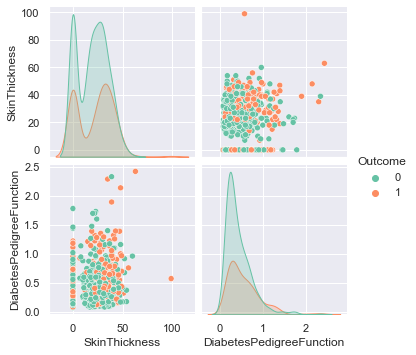

In [8]:
sns.pairplot(data, vars=["SkinThickness", "DiabetesPedigreeFunction"],  hue="Outcome", palette="Set2", diag_kind="kde", height=2.5)

In [9]:
# Select three indices to sample from the dataset
indices = [333,215,680]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of patient dataset:")
display(samples)
display(samples - data.mean().round())
display(samples - data.median().round())

Chosen samples of patient dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12,106,80,0,0,23.6,0.137,44,0
1,12,151,70,40,271,41.8,0.742,38,1
2,2,56,56,28,45,24.2,0.332,22,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8.0,-15.0,11.0,-21.0,-80.0,-8.4,0.137,11.0,0.0
1,8.0,30.0,1.0,19.0,191.0,9.8,0.742,5.0,1.0
2,-2.0,-65.0,-13.0,7.0,-35.0,-7.8,0.332,-11.0,0.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.0,-11.0,8.0,-23.0,-30.0,-8.4,0.137,15.0,0.0
1,9.0,34.0,-2.0,17.0,241.0,9.8,0.742,9.0,1.0
2,-1.0,-61.0,-16.0,5.0,15.0,-7.8,0.332,-7.0,0.0


### Identify feature and target columns


In [10]:
#feature columns
feature_cols = list(data.columns[:-1])

#target column 'Outcome'
target_col = data.columns[-1] 

print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

#Separate into feature data and target data
X_all = data[feature_cols]
print ("Q", X_all)
y_all = data[target_col]


print ("\nFeature values:")
print (X_all.head())
print (y_all.head())


print ("\nFeature values:")
print (X_all)
print (y_all)

Feature columns:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Target column: Outcome
Q      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93    

### Preprocess

There are no "non-numeric" columns to be converted. Since '0' are present / no data provided of few patients they are filled with avg terms 

In [11]:
def preprocess_features(X):
    ''' Preprocesses the patient data and converts zero variables into
        average values.'''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    blood_pressure_average = int(data['BloodPressure'].mean())
    insulin_average = int(data['Insulin'].mean()) 
    glucose_average = int(data['Glucose'].mean())
    bmi_average = int(data['BMI'].mean())
    skin_thickness_average = int(data['SkinThickness'].mean())
    
    # Get count of zero values for each feature
    blood_pressure_zero_count = (data['BloodPressure'] == 0.0).sum()
    insulin_zero_count = (data['Insulin'] == 0.0).sum()
    glucose_average_zero_count = (data['Glucose'] == 0.0).sum()
    bmi_zero_count = (data['BMI'] == 0.0).sum()
    skin_thickness_average_zero_count = (data['SkinThickness'] == 0.0).sum()
    print ("Total number of zero values in Blood Pressure feature: {}".format(blood_pressure_zero_count))
    print ("Total number of zero values in Insulin feature: {}".format(insulin_zero_count))
    print ("Total number of zero values in Glucose feature: {}".format(glucose_average_zero_count))
    print ("Total number of zero values in BMI: {}".format(bmi_zero_count))
    print ("Total number of zero values in Skin Thickness: {}".format(skin_thickness_average_zero_count))
    
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data value is zero, replace all zero values with the average of the feature
        if col == 'BloodPressure':
            col_data = col_data.replace(0, blood_pressure_average)
        
        # If data value is zero, replace all zero values with the average of the feature
        if col == 'Insulin':
            col_data = col_data.replace(0, insulin_average)
            
        # If data value is zero, replace all zero values with the average of the feature
        if col == 'Glucose':
            col_data = col_data.replace(0, glucose_average)
            
        # If data value is zero, replace all zero values with the average of the feature
        if col == 'BMI':
            col_data = col_data.replace(0, bmi_average)
            
        # If data value is zero, replace all zero values with the average of the feature
        if col == 'SkinThickness':
            col_data = col_data.replace(0, skin_thickness_average)
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())
print (y_all.head())

# Display a description of the dataset
display(X_all.describe())


Total number of zero values in Blood Pressure feature: 35
Total number of zero values in Insulin feature: 374
Total number of zero values in Glucose feature: 5
Total number of zero values in BMI: 11
Total number of zero values in Skin Thickness: 227
Processed feature columns (8 total features):
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Feature values:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35       79  33.6   
1            1       85             66             29       79  26.6   
2            8      183             64             20       79  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.436589,0.471876,33.240885
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.877335,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


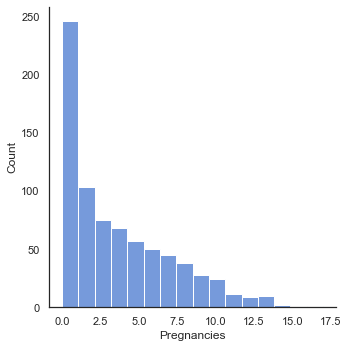

In [13]:
seaborn.set(color_codes=True)
sns.set(style="white", palette="muted")

sns.displot(X_all['Pregnancies']) 

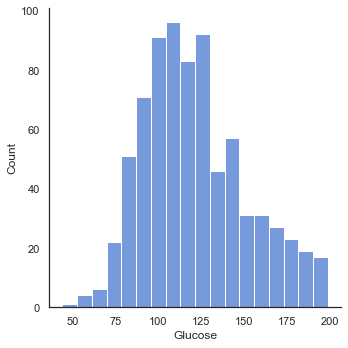

In [14]:
sns.displot(X_all['Glucose'])

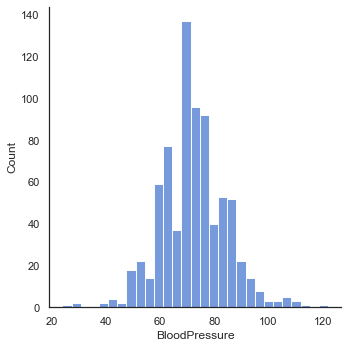

In [15]:
sns.displot(X_all['BloodPressure'])

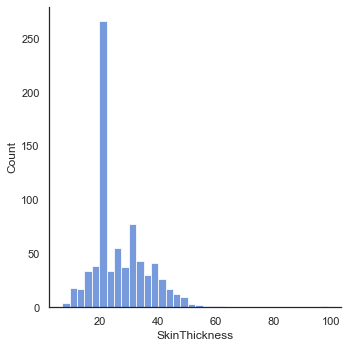

In [16]:
sns.displot(X_all['SkinThickness'])

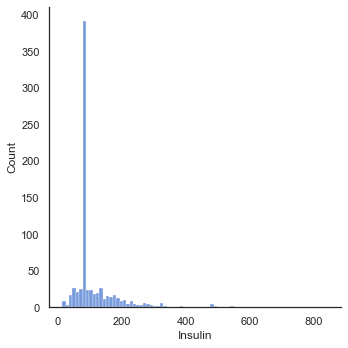

In [17]:
sns.displot(X_all['Insulin'])

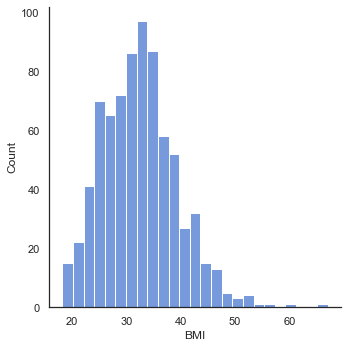

In [18]:
sns.displot(X_all['BMI'])

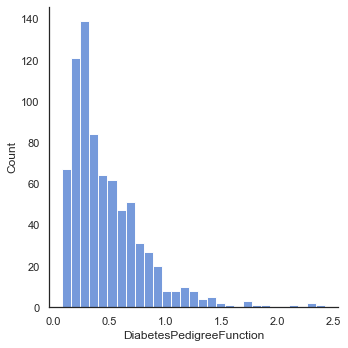

In [19]:
sns.displot(X_all['DiabetesPedigreeFunction'])

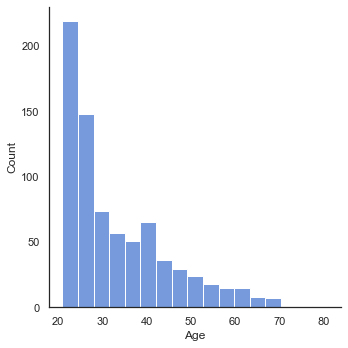

In [20]:
sns.displot(X_all['Age'])

### Training and Testing Data Split


In [21]:
from sklearn.model_selection import train_test_split

#training points
num_train = 576

#testing points
num_test = X_all.shape[0] - num_train

#split the dataset into training and testing points
X_train, X_test, y_train, y_test  = train_test_split(X_all, y_all, test_size=num_test, random_state=0)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 576 samples.
Testing set has 192 samples.


### Initialize three helper functions for training and testing the models. 

In [22]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred,  average='weighted')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Model Performance Metrics


In [23]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

# Initialize the models
clf_A = LinearSVC(C=1.0)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(n_estimators=12)
clf_D = GradientBoostingClassifier()
clf_E = SVC(random_state=2)

# Calling 'train_predict' function for each classifier 
train_predict(clf_A, X_train, y_train, X_test, y_test)
print("")
train_predict(clf_B, X_train, y_train, X_test, y_test)
print("")
train_predict(clf_C, X_train, y_train, X_test, y_test)
print("")
train_predict(clf_D, X_train, y_train, X_test, y_test)
print("")
train_predict(clf_E, X_train, y_train, X_test, y_test)

Training a LinearSVC using a training set size of 576. . .


C:\Users\visha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Trained model in 2.9776 seconds
Made predictions in 0.0033 seconds.
F1 score for training set: 0.5143.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.5467.

Training a KNeighborsClassifier using a training set size of 576. . .
Trained model in 0.0021 seconds
Made predictions in 0.0150 seconds.
F1 score for training set: 0.7911.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.7511.

Training a RandomForestClassifier using a training set size of 576. . .
Trained model in 0.0200 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.9843.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.8098.

Training a GradientBoostingClassifier using a training set size of 576. . .
Trained model in 0.1100 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.9155.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7993.

Training a SVC using a training set size of 576. . .
Trained model in 0.0160 seconds
Made predicti

LinearSVC
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.32      1.00      0.49        62

    accuracy                           0.32       192
   macro avg       0.16      0.50      0.24       192
weighted avg       0.10      0.32      0.16       192



C:\Users\visha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\visha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\visha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\visha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

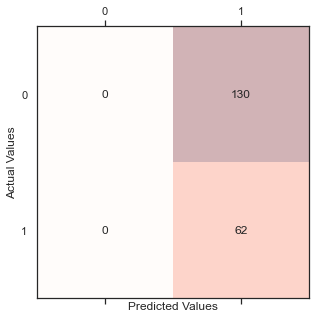

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
y_pred = clf_A.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print ("LinearSVC")

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       130
           1       0.64      0.56      0.60        62

    accuracy                           0.76       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.75      0.76      0.75       192



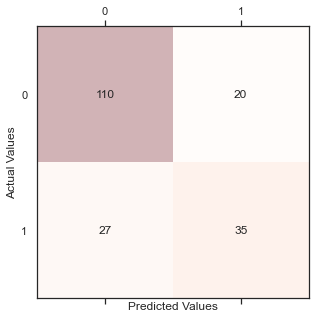

In [25]:
y_pred = clf_B.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print ("KNeighborsClassifier")

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       130
           1       0.68      0.58      0.63        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



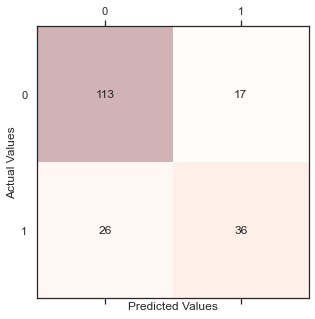

In [26]:
y_pred = clf_C.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print ("RandomForestClassifier")

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



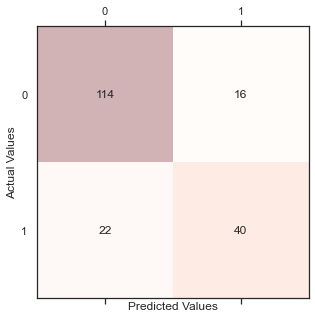

In [27]:
y_pred = clf_D.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print ("GradientBoostingClassifier")

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

SVC
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       130
           1       0.72      0.45      0.55        62

    accuracy                           0.77       192
   macro avg       0.75      0.68      0.70       192
weighted avg       0.76      0.77      0.75       192



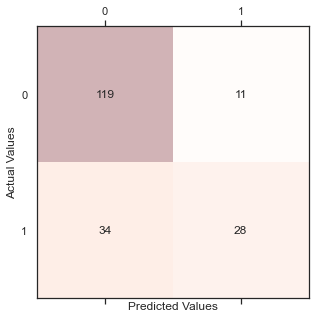

In [28]:
y_pred = clf_E.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print ("SVC")

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [29]:
import pickle
pickle.dump(clf_D,open("TrainedModel.dat",'wb'))

## Refinement on the Best Performing Model


### Model Tuning

In [30]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Created the hyperparameters list to tune
loss = ['deviance', 'exponential']
n_estimators = [30, 60]
max_depth = [1, 2, 3, 4, 5]
random_state = [0, 24]
parameters =  {'loss': loss, 'n_estimators' : n_estimators, 'max_depth' : max_depth, 'random_state' : random_state}


clf = GradientBoostingClassifier()

 
f1_scorer = make_scorer(f1_score, pos_label=1)

# Perform grid search on the classifier using the f1_scorer
clf_grid_search = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=5, verbose=0)
print (clf_grid_search)

# Fit the grid search object to the training data and find the optimal parameters
clf_grid_search.fit(X_train, y_train)


best_estimator = clf_grid_search.best_estimator_
print (best_estimator)

# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf_grid_search, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf_grid_search, X_test, y_test)))

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_depth': [1, 2, 3, 4, 5], 'n_estimators': [30, 60],
                         'random_state': [0, 24]},
             scoring=make_scorer(f1_score, pos_label=1))
GradientBoostingClassifier(max_depth=4, n_estimators=60, random_state=0)
Made predictions in 0.0030 seconds.
Tuned model has a training F1 score of 0.9510.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.7688.


In [31]:
#Printing feature importances
importances = best_estimator.feature_importances_
print (importances)
print (clf_grid_search.best_params_)

[0.05946307 0.35660218 0.05231766 0.04361638 0.06119878 0.18265437
 0.11037258 0.13377498]
{'loss': 'deviance', 'max_depth': 4, 'n_estimators': 60, 'random_state': 0}


In [32]:
###	Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age